# Introduction
- in this chapter, we apply the methods to one dataset in order to present their relative merit.
- We will use the data to build a predictive model for the evaluation of a player's value.
- Data from this website for 2019 were scrapped and made available at the Kaggle webpage https://www.kaggle.com/karangadiya/fifa19

## Data preparation
- the original dataset contains 89 variables that describe 16,924 players.
- The variables are: age, nationality, club, wage, etc.
- In particular, variale Value.EUR contains the player's EUR value. This will be our dependent variable

In [1]:
import dalex as dx
fifa = dx.datasets.load_fifa()
fifa

,nationality,overall,potential,wage_eur,value_eur,age,height_cm,weight_kg,attacking_crossing,attacking_finishing,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
short_name,,,,,,,,,,,,,,,,,,,,,
L. Messi,Argentina,94,94,565000,95500000,32,170,72,88,95,...,75,96,33,37,26,6,11,15,14,8
Cristiano Ronaldo,Portugal,93,93,405000,58500000,34,187,83,84,94,...,85,95,28,32,24,7,11,15,14,11
Neymar Jr,Brazil,92,92,290000,105500000,27,175,68,87,87,...,90,94,27,26,29,9,9,15,15,11
J. Oblak,Slovenia,91,93,125000,77500000,26,188,87,13,11,...,11,68,27,12,18,87,92,78,90,89
E. Hazard,Belgium,91,91,470000,90000000,28,175,74,81,84,...,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E. Calaio,Italy,70,70,2000,625000,37,179,75,50,74,...,79,67,49,14,15,9,9,5,9,8
W. Hoolahan,Republic of Ireland,70,70,2000,600000,37,168,71,72,63,...,77,73,42,51,36,13,7,16,11,16
B. Johnson,England,70,70,12000,1200000,32,178,68,68,68,...,72,76,67,69,66,11,6,7,15,11


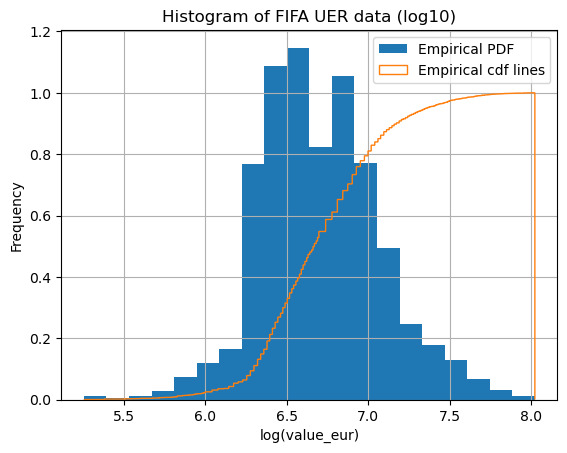

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import scipy

# plot the histogram of the data
# data = fifa['value_eur']
# plt.hist(np.log10(data), bins=15)

#plot the histogram of the data together with the CDF lines
data = np.log10(fifa['value_eur'])
plt.hist(data, bins=20, density=True, label="Empirical PDF")
plt.hist(data, bins=1000, density=True, cumulative=True, histtype='step', label='Empirical cdf lines')

plt.xlabel('log(value_eur)')
plt.ylabel('Frequency')
plt.grid(True)
plt.title('Histogram of FIFA UER data (log10)')
plt.legend()
plt.show()

In [3]:
fifa.keys()

Index(['nationality', 'overall', 'potential', 'wage_eur', 'value_eur', 'age',
       'height_cm', 'weight_kg', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes'],
      dtype='object')

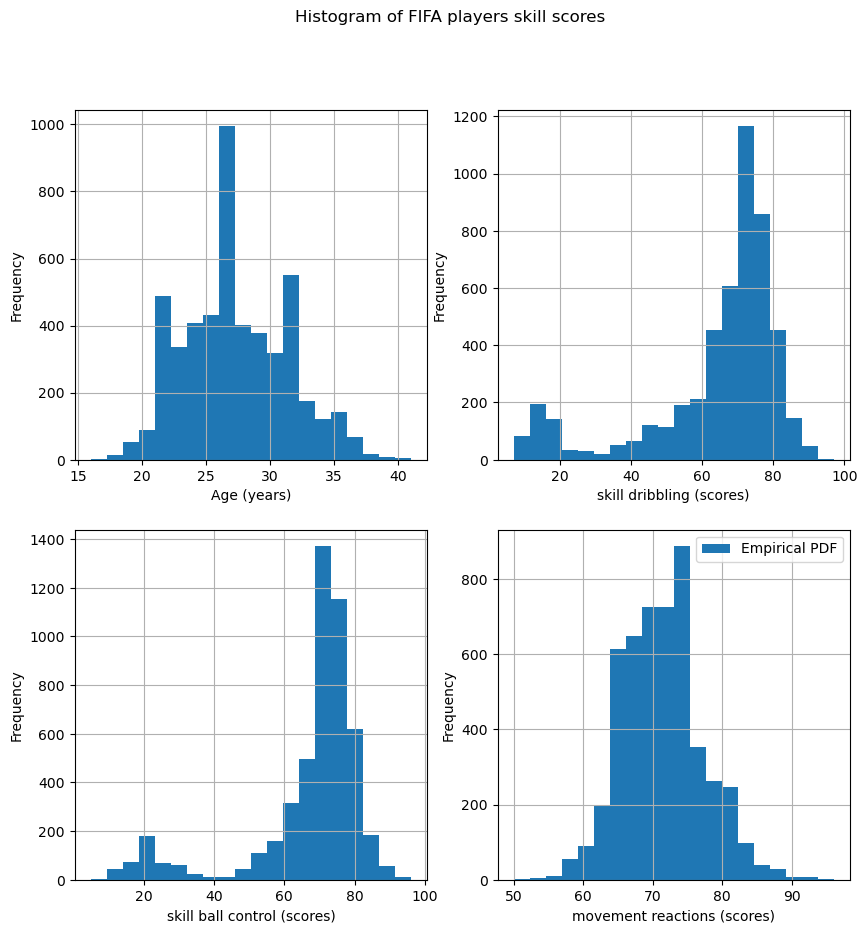

In [4]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
data = fifa['age']
plt.hist(data, bins=20, label="Empirical PDF")
plt.xlabel('Age (years)')
plt.grid(True)
plt.ylabel('Frequency')

plt.subplot(222)
data = fifa['skill_dribbling']
plt.hist(data, bins=20, label="Empirical PDF")
plt.xlabel('skill dribbling (scores)')
plt.grid(True)
plt.ylabel('Frequency')

plt.subplot(223)
data = fifa['skill_ball_control']
plt.hist(data, bins=20, label="Empirical PDF")
plt.xlabel('skill ball control (scores)')
plt.grid(True)
plt.ylabel('Frequency')

plt.subplot(224)
data = fifa['movement_reactions']
plt.hist(data, bins=20, label="Empirical PDF")
plt.xlabel('movement reactions (scores)')
plt.grid(True)
plt.ylabel('Frequency')

plt.suptitle('Histogram of FIFA players skill scores')
plt.grid(True)
plt.ylabel('Frequency')
plt.legend()
plt.show()

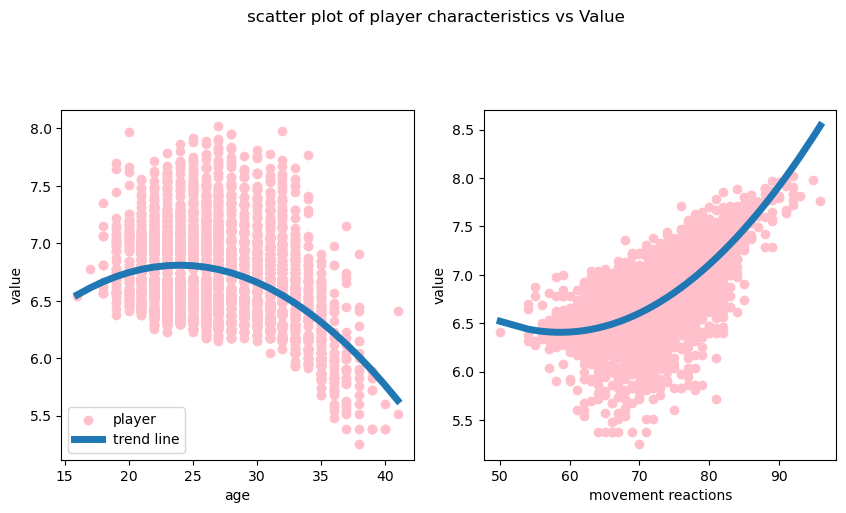

In [5]:

plt.figure(figsize=(10, 10))

plt.subplot(221)
data = np.array(fifa[['age', 'value_eur']], dtype = 'float32')
data[:, 1] = np.log10(data[:, 1])
z = np.polyfit(data[:, 0], data[:, 1], deg=2)
p = np.poly1d(z)
# draw the scatter plot of data
plt.scatter(data[:, 0], data[:, 1], color = 'pink', label = 'player')
x = np.array(sorted(data[:,0]))
plt.plot(x, p(x), label="trend line", linewidth = 5)
plt.xlabel('age')
plt.ylabel('value')
plt.legend()


plt.subplot(222)
data = np.array(fifa[['movement_reactions', 'value_eur']], dtype = 'float32')
data[:, 1] = np.log10(data[:, 1])
z = np.polyfit(data[:, 0], data[:, 1], deg=2)
p = np.poly1d(z)
# draw the scatter plot of data
plt.scatter(data[:, 0], data[:, 1], color = 'pink', label = 'player')
x = np.array(sorted(data[:,0]))
plt.plot(x, p(x), label="trend line", linewidth = 5)
plt.xlabel('movement reactions')
plt.ylabel('value')


plt.suptitle('scatter plot of player characteristics vs Value')
plt.show()

# Model Assemmbly

In [6]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
import numpy as np

X = fifa.drop(["nationality", "overall", "potential", 
     "value_eur", "wage_eur"], axis = 1)
y = fifa['value_eur']
ylog = np.log(y)

X_train, X_test, ylog_train, ylog_test, y_train, y_test = train_test_split(X, ylog, y, test_size = 0.25, random_state = 4)
gbm_model = LGBMRegressor()
gbm_model.fit(X_train, ylog_train, verbose = False)

c:\Users\197796\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMRegressor()

In [8]:
# predict function
def predict_function(model, data):
    return np.exp(model.predict(data))
    
fifa_gbm_exp = dx.Explainer(gbm_model, X_test, y_test, 
    predict_function = predict_function, label = 'gbm')

Preparation of a new explainer is initiated

  -> data              : 1250 rows 37 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1250 values
  -> model_class       : lightgbm.sklearn.LGBMRegressor (default)
  -> label             : gbm
  -> predict function  : <function predict_function at 0x000001F3F84E1DC0> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 3.57e+05, mean = 7.12e+06, max = 8.12e+07
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1e+07, mean = 2.12e+05, max = 2.43e+07
  -> model_info        : package lightgbm

A new explainer has been created!


# Model audit results

In [9]:
fifa_md_gbm = fifa_gbm_exp.model_diagnostics()
fifa_md_gbm.plot(variable = "y", yvariable = "y_hat")

# Model understanding (dataset-level explanation)

In [10]:
fifa_mp_gbm = fifa_gbm_exp.model_parts()
fifa_mp_gbm.plot(max_vars = 20)

In [11]:
fifa_mp_gbm = fifa_gbm_exp.model_profile()

fifa_mp_gbm.plot(variables = ['movement_reactions',
    'skill_ball_control', 'skill_dribbling', 'age'])

Calculating ceteris paribus: 100%|██████████| 37/37 [00:00<00:00, 39.68it/s]


# Instance-level axplanations

In [14]:
cr7 = X.loc['Cristiano Ronaldo',]
cr7

age                            34
height_cm                     187
weight_kg                      83
attacking_crossing             84
attacking_finishing            94
attacking_heading_accuracy     89
attacking_short_passing        83
attacking_volleys              87
skill_dribbling                89
skill_curve                    81
skill_fk_accuracy              76
skill_long_passing             77
skill_ball_control             92
movement_acceleration          89
movement_sprint_speed          91
movement_agility               87
movement_reactions             96
movement_balance               71
power_shot_power               95
power_jumping                  95
power_stamina                  85
power_strength                 78
power_long_shots               93
mentality_aggression           63
mentality_interceptions        29
mentality_positioning          95
mentality_vision               82
mentality_penalties            85
mentality_composure            95
defending_mark

In [15]:
fifa_pp_gbm = fifa_gbm_exp.predict_parts(cr7, type='break_down')
fifa_pp_gbm.plot(max_vars = 20)

In [16]:
fifa_mp_gbm = fifa_gbm_exp.predict_profile(cr7)

fifa_mp_gbm.plot(variables =  ['movement_reactions',
    'skill_ball_control', 'skill_dribbling', 'age'])

Calculating ceteris paribus: 100%|██████████| 37/37 [00:00<00:00, 578.13it/s]


In [19]:
fifa_pp_gbm = fifa_gbm_exp.predict_parts(cr7, type='shap')
fifa_pp_gbm.plot(max_vars = 20)